In [26]:
import pandas as pd
import numpy as np

In [27]:
df = pd.read_csv('spam.csv', encoding='windows-1252')

In [28]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2522,ham,Dunno lei... I might b eatin wif my frens... I...,NaN,NaN,NaN
4044,ham,If You mean the website. Yes.,NaN,NaN,NaN
246,ham,I asked you to call him now ok,NaN,NaN,NaN
2527,ham,Mmmmm ... I loved waking to your words this mo...,NaN,NaN,NaN
749,ham,By monday next week. Give me the full gist,NaN,NaN,NaN


In [29]:
df.shape

(5572, 5)

In [30]:
#1 .Data Cleaning
#2 .EDA
#3 .Text Preprocessing
#4 .Model Building
#5 .Evaluation
#6 .Improvment
#7 .Website
#8 .Deploy

##Data Cleaning 🧹

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [32]:
#drop last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [33]:
df.sample(5)

,v1,v2
2398,ham,YO YO YO BYATCH WHASSUP?
2504,ham,"Hello, my boytoy! I made it home and my consta..."
5452,ham,What???? Hello wats talks email address?
3944,ham,I will be gentle princess! We will make sweet ...
1711,ham,I got your back! Do you have any dislikes in bed?


In [34]:
#renaming the columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
1222,ham,Teach me apps da. When you come to college.
3457,ham,Have your lunch and come quickly and open the ...
122,spam,Todays Voda numbers ending 7548 are selected t...
3188,ham,X2 &lt;#&gt; . Are you going to get that
2767,ham,Wow v v impressed. Have funs shopping!


In [35]:
#set spam as 1 non spam as 0
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [36]:
df['target']=encoder.fit_transform(df['target'])

In [37]:
df.sample(5)

,target,text
794,0,There generally isn't one. It's an uncountable...
287,0,hi baby im cruisin with my girl friend what r ...
1194,0,Ok... C ya...
3920,0,Do 1 thing! Change that sentence into: \Becaus...
4268,0,Beauty sleep can help ur pimples too.


In [38]:
#checking for missing values
df.isnull().sum()

,0
target,0
text,0


In [39]:
#check for duplicate values
df.duplicated().sum()

np.int64(403)

In [40]:
#remove duplicates
df=df.drop_duplicates(keep='first')

In [41]:
df.duplicated().sum()

np.int64(0)

In [42]:
df.shape

(5169, 2)

##EDA 🔎

In [43]:
df['target'].value_counts()

,count
target,
0,4516
1,653


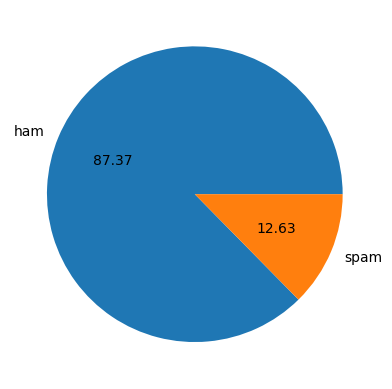

In [44]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [45]:
#Data is imbalanced

In [46]:
import nltk

In [47]:
pip install nltk

In [48]:
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [49]:
df['num_of_characters'] = df['text'].apply(len)

In [50]:
#num of words
df['text'].apply(lambda x:nltk.word_tokenize(x))

,text
0,"[Go, until, jurong, point, ,, crazy, .., Avail..."
1,"[Ok, lar, ..., Joking, wif, u, oni, ...]"
2,"[Free, entry, in, 2, a, wkly, comp, to, win, F..."
3,"[U, dun, say, so, early, hor, ..., U, c, alrea..."
4,"[Nah, I, do, n't, think, he, goes, to, usf, ,,..."
...,...
5567,"[This, is, the, 2nd, time, we, have, tried, 2,..."
5568,"[Will, Ì_, b, going, to, esplanade, fr, home, ?]"
5569,"[Pity, ,, *, was, in, mood, for, that, ., So, ..."
5570,"[The, guy, did, some, bitching, but, I, acted,..."


In [51]:
#num of words
df['num_of_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [52]:
df.head()

,target,text,num_of_characters,num_of_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [53]:
#num of sentences
df['text'].apply(lambda x:nltk.sent_tokenize(x))

,text
0,"[Go until jurong point, crazy.., Available onl..."
1,"[Ok lar..., Joking wif u oni...]"
2,[Free entry in 2 a wkly comp to win FA Cup fin...
3,[U dun say so early hor... U c already then sa...
4,"[Nah I don't think he goes to usf, he lives ar..."
...,...
5567,[This is the 2nd time we have tried 2 contact ...
5568,[Will Ì_ b going to esplanade fr home?]
5569,"[Pity, * was in mood for that., So...any other..."
5570,[The guy did some bitching but I acted like i'...


In [54]:
#num of words
df['num_of_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [55]:
df.head()

,target,text,num_of_characters,num_of_words,num_of_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [56]:
df[['num_of_characters','num_of_words','num_of_sentences']].describe()


,num_of_characters,num_of_words,num_of_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [57]:
#ham
df[df['target']==0][['num_of_characters','num_of_words','num_of_sentences']].describe()


,num_of_characters,num_of_words,num_of_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [58]:
#spam
df[df['target']==1][['num_of_characters','num_of_words','num_of_sentences']].describe()


,num_of_characters,num_of_words,num_of_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [59]:
import seaborn as sns

<Axes: xlabel='num_of_characters', ylabel='Count'>

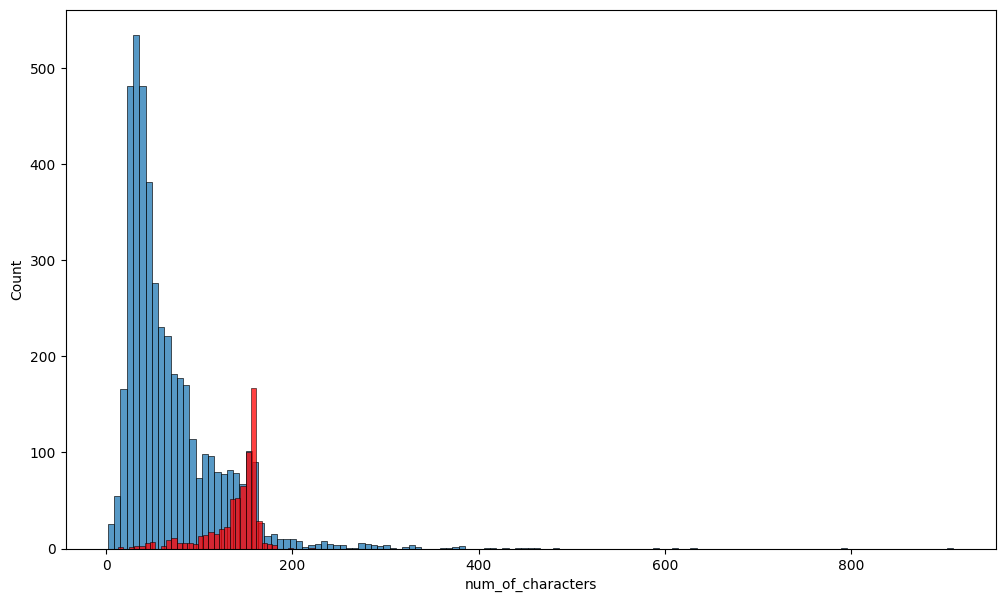

In [60]:
plt.figure(figsize=(12,7))
sns.histplot(df[df['target']==0]['num_of_characters'])
sns.histplot(df[df['target']==1]['num_of_characters'],color='red')

<Axes: xlabel='num_of_words', ylabel='Count'>

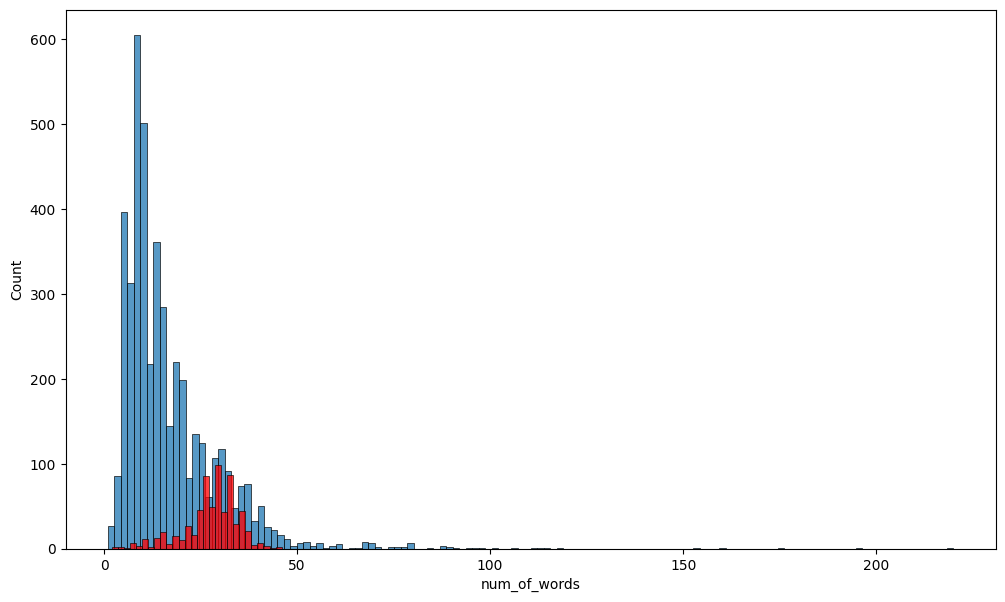

In [61]:
plt.figure(figsize=(12,7))
sns.histplot(df[df['target']==0]['num_of_words'])
sns.histplot(df[df['target']==1]['num_of_words'],color='red')

<Axes: xlabel='num_of_sentences', ylabel='Count'>

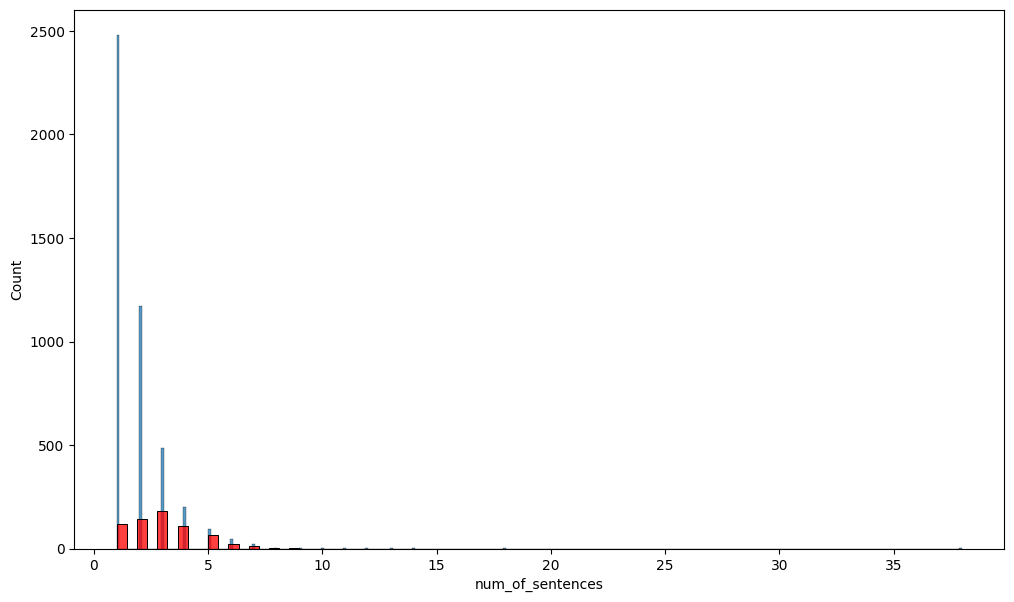

In [62]:
plt.figure(figsize=(12,7))
sns.histplot(df[df['target']==0]['num_of_sentences'])
sns.histplot(df[df['target']==1]['num_of_sentences'],color='red')

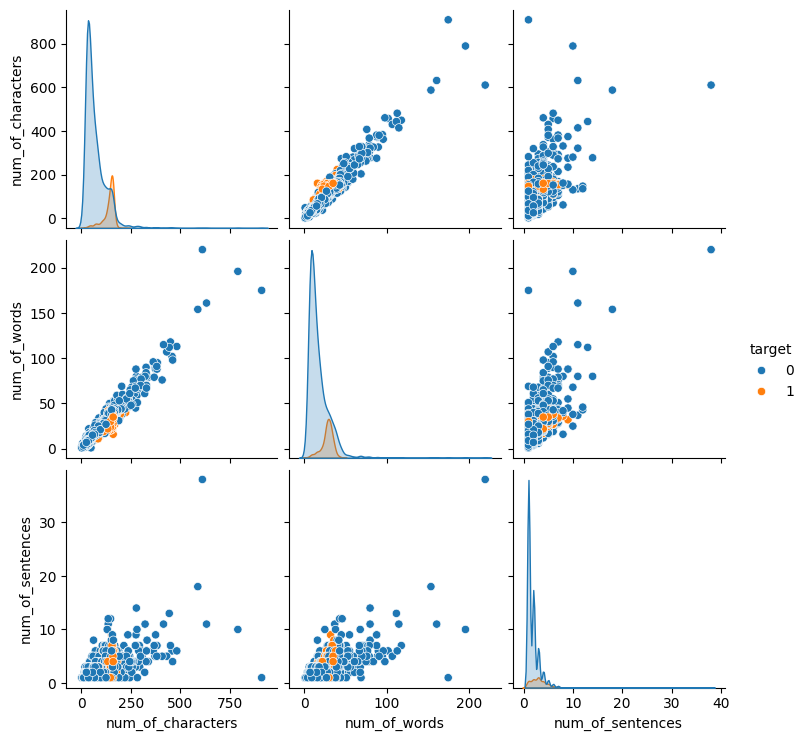

In [63]:
sns.pairplot(df,hue='target')

<Axes: >

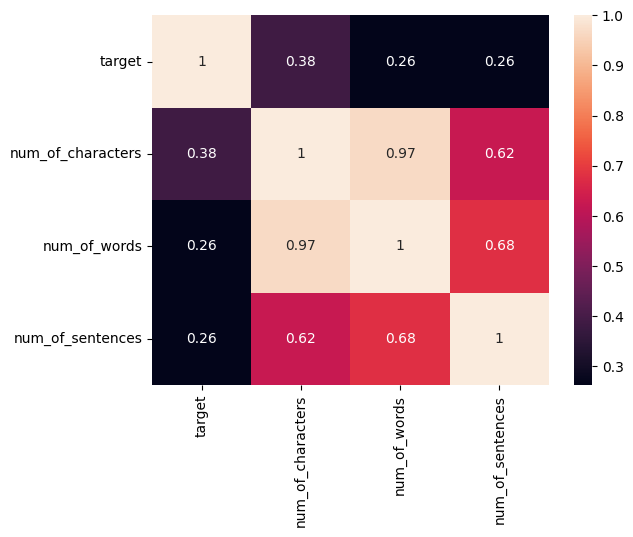

In [64]:
sns.heatmap(df[['target', 'num_of_characters', 'num_of_words', 'num_of_sentences']].corr(),annot=True)

In [65]:
#corelation is very strong , multicollinearity in data , we take any one of the 3 cols
#better to take characters as it has better corr with target

##Data Preprocessing ⚒️


*   Lowercase
*   Tokenization
*   Removing special characters
*   Removing stop words and punctuation
*   Stemming



In [66]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [67]:
import string

In [68]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [69]:
from nltk.corpus import stopwords


def transform_text(text):
  text=text.lower()
  text=nltk.word_tokenize(text)

  y=[]

  for t in text:
    if t.isalnum() and t not in stopwords.words('english') and t not in string.punctuation:
      y.append(t)

  y = [ps.stem(word) for word in y]



  return " ".join(y)

In [70]:
transform_text("Did you liking my ppt on ML?")

'like ppt ml'

In [71]:
df['transformed_text'] = df['text'].apply(transform_text)

In [72]:
df.head()

,target,text,num_of_characters,num_of_words,num_of_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [73]:
#lets generate wordclouds
from  wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [74]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

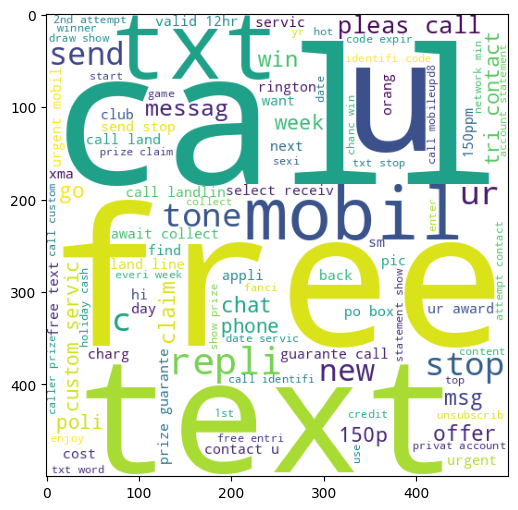

In [75]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [76]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

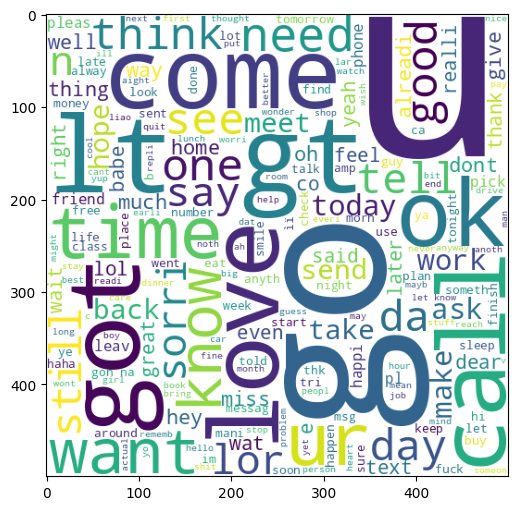

In [77]:
plt.figure(figsize=(15,6))

plt.imshow(ham_wc)

In [78]:
##now we see what are the most frequent words in spam and ham

#first we get a list of all words
spam_corpus=[]

for msg in df[df['target']==1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [79]:
##now we count the words
from collections import Counter
Counter(spam_corpus)

Counter({'free': 191,
         'entri': 21,
         '2': 155,
         'wkli': 9,
         'comp': 8,
         'win': 48,
         'fa': 2,
         'cup': 3,
         'final': 14,
         'tkt': 2,
         '21st': 1,
         'may': 6,
         'text': 122,
         '87121': 2,
         'receiv': 31,
         'question': 9,
         'std': 6,
         'txt': 141,
         'rate': 26,
         'c': 45,
         'appli': 24,
         '08452810075over18': 1,
         'freemsg': 14,
         'hey': 5,
         'darl': 2,
         '3': 20,
         'week': 49,
         'word': 21,
         'back': 20,
         'like': 12,
         'fun': 8,
         'still': 5,
         'tb': 1,
         'ok': 5,
         'xxx': 10,
         'chg': 2,
         'send': 60,
         'rcv': 2,
         'winner': 13,
         'valu': 8,
         'network': 26,
         'custom': 42,
         'select': 26,
         'receivea': 1,
         'prize': 82,
         'reward': 9,
         'claim': 98,
         'cal

In [80]:
##convert the word list into a df
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


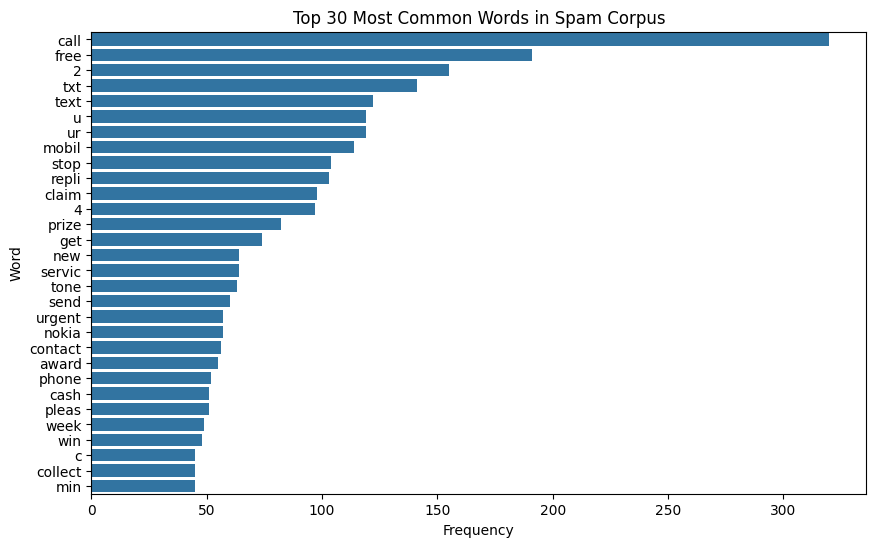

In [81]:
##time to visualize it with a bar plot

# Get top 30 most common words
common_words = Counter(spam_corpus).most_common(30)

# Convert to DataFrame
df_common = pd.DataFrame(common_words, columns=['Word', 'Frequency'])

# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Word', data=df_common)
plt.title("Top 30 Most Common Words in Spam Corpus")
plt.show()

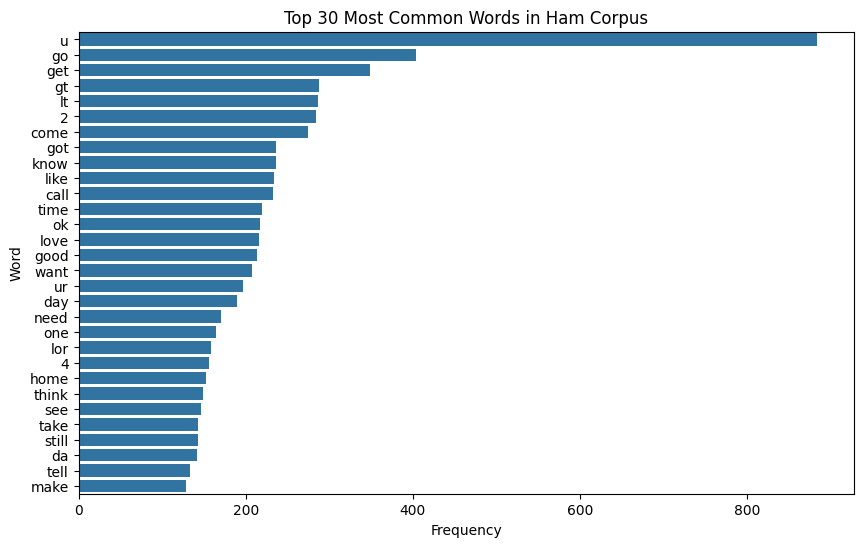

In [82]:
#for ham

#first we get a list of all words
ham_corpus=[]

for msg in df[df['target']==0]['transformed_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

# Get top 30 most common words
common_words2 = Counter(ham_corpus).most_common(30)

# Convert to DataFrame
df_common2 = pd.DataFrame(common_words2, columns=['Word', 'Frequency'])

# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Word', data=df_common2)
plt.title("Top 30 Most Common Words in Ham Corpus")
plt.show()

##4. Model Building 🏗️

In [83]:
##first we vectorize text
##using bag of words
df.head()

,target,text,num_of_characters,num_of_words,num_of_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [84]:
##first we vectorize text
##using bag of words
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [85]:
X=cv.fit_transform(df['transformed_text']).toarray()

In [86]:
X.shape

(5169, 6708)

In [87]:
y=df['target'].values

In [88]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=50)

In [91]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [92]:
gnb= GaussianNB()
mnb= MultinomialNB()
bnb = BernoulliNB()

In [93]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))


0.874274661508704
[[783 117]
 [ 13 121]]
0.5084033613445378


In [94]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9729206963249516
[[881  19]
 [  9 125]]
0.8680555555555556


In [95]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.971953578336557
[[898   2]
 [ 27 107]]
0.981651376146789


In [96]:
##bernoulli is the best among the 3 NB classifiers

In [97]:
#now let us try using TFIDF instead of bag of words

trying with tfidf


In [98]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [99]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [100]:
X.shape

(5169, 3000)

In [101]:
y = df['target'].values

In [102]:
from sklearn.model_selection import train_test_split

In [103]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [104]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.874274661508704
[[790 106]
 [ 24 114]]
0.5181818181818182


In [105]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [106]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [107]:
# tfidf --> MNB

In [108]:
### as we can observe
# mnb with tfidf vectorizer has 100% precision(zero false positives)
#so we have the choice of mnb or bnb
#since precision is a more reliable measure in this case of an unbalanced dataset , we choose mnb with tfidf

In [109]:
#let us checkout out if any other model is performing better

In [110]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [111]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [112]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [113]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [114]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [115]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9323017408123792
Precision -  0.8333333333333334
For  LR
Accuracy -  0.9555125725338491
Precision -  0.96
For  RF
Accuracy -  0.9738878143133463
Precision -  0.9826086956521739
For  AdaBoost
Accuracy -  0.9216634429400387
Precision -  0.8202247191011236
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9506769825918762
Precision -  0.9306930693069307
For  xgb
Accuracy -  0.965183752417795
Precision -  0.9396551724137931


In [116]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [117]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.973888,0.982609
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.955513,0.960000
10,xgb,0.965184,0.939655
9,GBDT,0.950677,0.930693
7,BgC,0.958414,0.868217
3,DT,0.932302,0.833333


In [122]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [123]:

performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.973888
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.955513
6,xgb,Accuracy,0.965184
7,GBDT,Accuracy,0.950677
8,BgC,Accuracy,0.958414
9,DT,Accuracy,0.932302


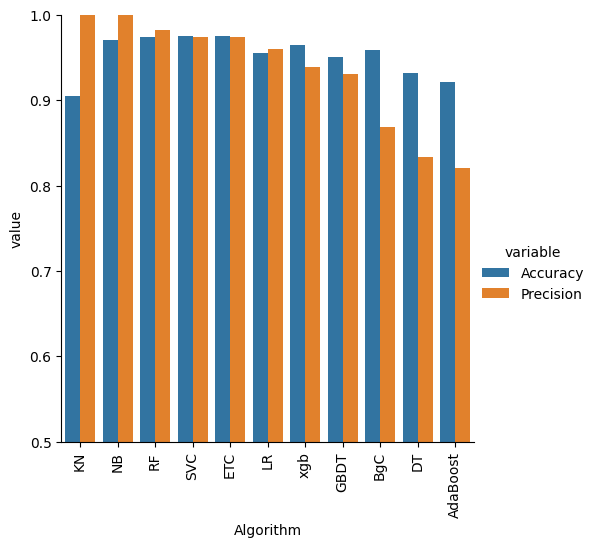

In [124]:
sns.catplot(x = 'Algorithm', y='value',
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [125]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [126]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [127]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [128]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [129]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9796905222437138
Precision 0.9834710743801653


In [130]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))